<a href="https://colab.research.google.com/github/bhargavi1973/TitanicSurvivalPrediction/blob/main/TitanicSurvivalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
train = pd.read_csv('titanic_train.csv')

In [80]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**#Exploratory Data Analysis**


In [81]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Most of the data values in Cabin column has NaN , missing values , we will drop Cabin column to remove the uncertainity and manipulate the values in Age column as Age column has comparatively less number of missing values to be handled.


<Axes: >

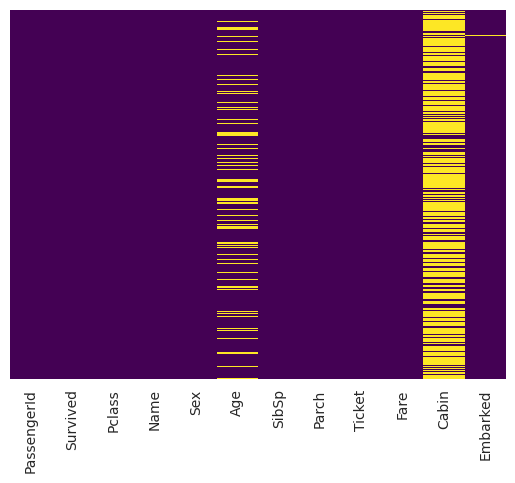

In [82]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

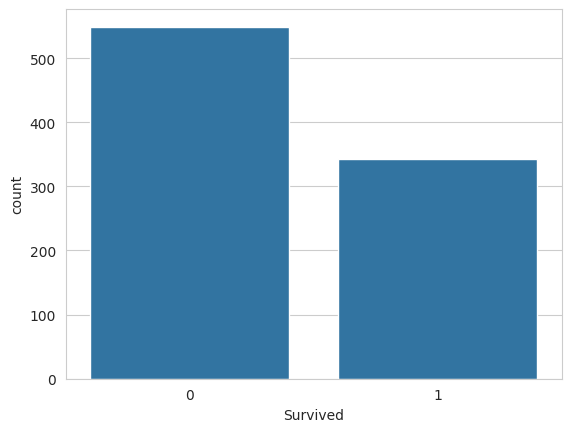

In [83]:
# count of people on titanic vs survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

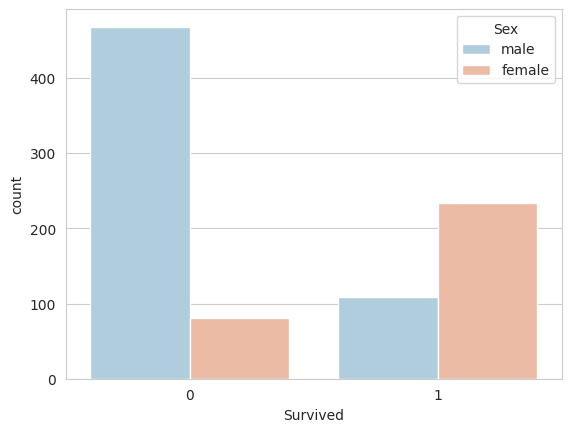

In [84]:
# count of male and female who survived and died
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

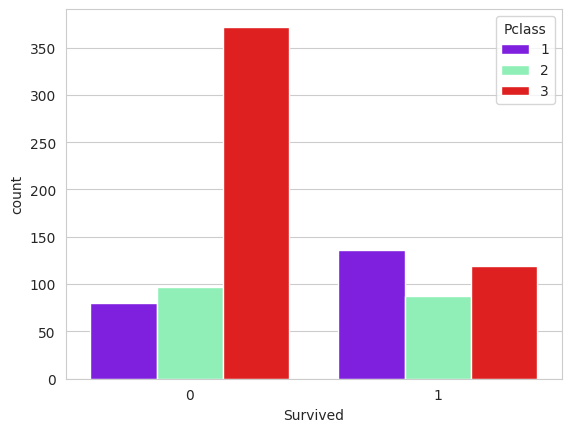

In [85]:
#Pclass vs survived plot : most Pclass 3 people died and Pclass 1 people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

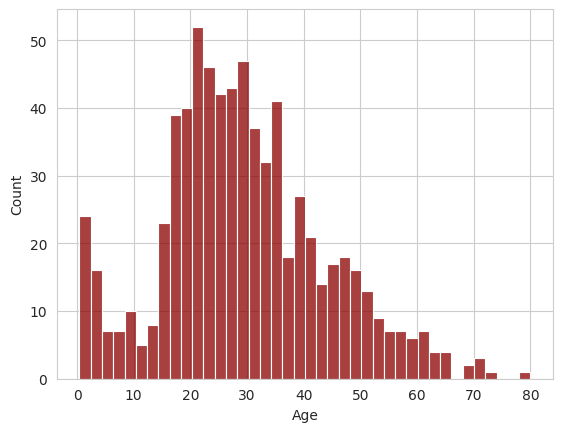

In [86]:
#drop the null values in Age column and then plot the count of people on titanic vs age : most people belong to 15-35 age group who were on the titanic
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

/tmp/ipython-input-87-855030142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,legend = False,palette ='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

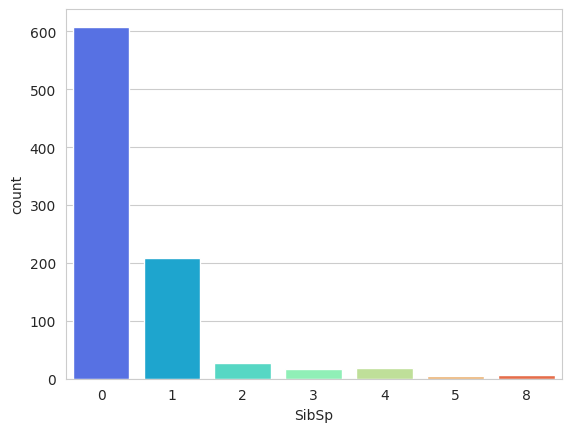

In [87]:
# Sibsp(Spouse and siblings) vs count plot : most people have no Spouse or Siblings
sns.countplot(x='SibSp',data=train,legend = False,palette ='rainbow')

<Axes: >

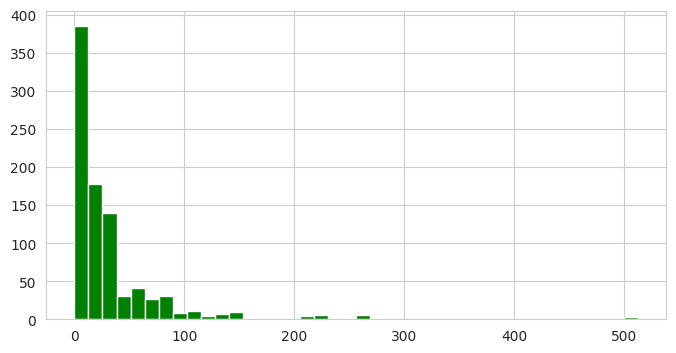

In [88]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))


Data Cleaning

/tmp/ipython-input-89-3806955499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

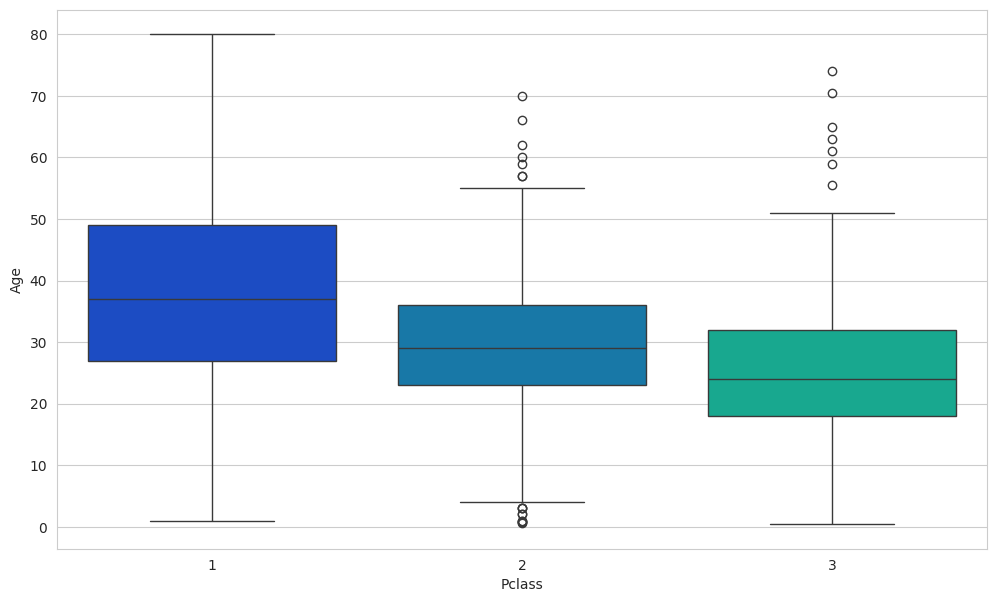

In [89]:
#we will  use the boxplot to calculate the average value for each Pclass and replace the missing values of Age with the calculated values
# 1: 37 , 2: 29 , 3: 24
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [90]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [91]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipython-input-90-3438464256.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-90-3438464256.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

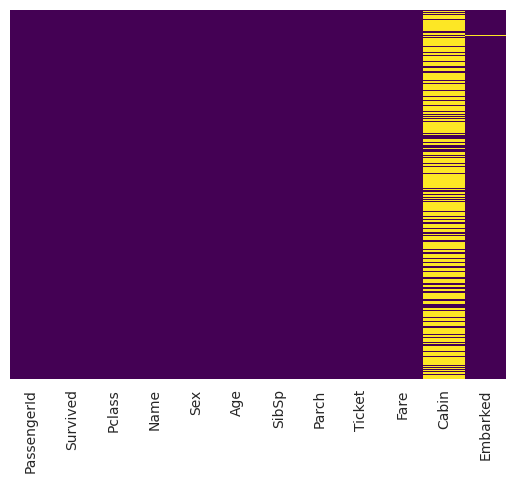

In [92]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [93]:
train.drop('Cabin',axis=1,inplace=True)

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [95]:
# prompt: Using dataframe train: Change the value in the Sex column with 1 for Male and 0 for female

# Map 'male' to 1 and 'female' to 0 in the 'Sex' column
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [97]:
# prompt: Using dataframe train: how to convert the Ticket and Fare column into a feature to train the model

import pandas as pd
# Impute missing Fare values with the mean
train['Fare'].fillna(train['Fare'].mean(), inplace=True)

# Create a new feature based on Fare using qcut for binning
train['Fare_Bin'] = pd.qcut(train['Fare'], 4, labels=[0, 1, 2, 3])

# Extract the first letter/prefix of the Ticket column as a new feature
# Replace non-alphanumeric characters and handle potential errors
train['Ticket_Prefix'] = train['Ticket'].apply(lambda x: ''.join(filter(str.isalpha, str(x)))[:1] if pd.notnull(x) else '')
train['Ticket_Prefix'].replace('', 'None', inplace=True)

# One-hot encode the Ticket_Prefix feature
ticket_prefix_dummies = pd.get_dummies(train['Ticket_Prefix'], prefix='Ticket_Prefix')
train = pd.concat([train, ticket_prefix_dummies], axis=1)

# Drop the original Ticket and Fare columns if they are no longer needed
train = train.drop(['Ticket', 'Fare', 'Ticket_Prefix'], axis=1)

/tmp/ipython-input-97-4015225783.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Fare'].fillna(train['Fare'].mean(), inplace=True)
/tmp/ipython-input-97-4015225783.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,S,0,True,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,C,3,False,False,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,S,1,False,False,False,False,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,S,3,False,False,False,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,S,1,False,False,False,False,True,False,False,False


In [100]:
# prompt: drop the name column and replace all the Ticket_Prefix columns with 1 for True and 0 for False

train.drop('Name', axis=1, inplace=True)


In [101]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W
0,1,0,3,1,22.0,1,0,S,0,True,False,False,False,False,False,False,False
1,2,1,1,0,38.0,1,0,C,3,False,False,False,False,False,True,False,False
2,3,1,3,0,26.0,0,0,S,1,False,False,False,False,False,False,True,False
3,4,1,1,0,35.0,1,0,S,3,False,False,False,False,True,False,False,False
4,5,0,3,1,35.0,0,0,S,1,False,False,False,False,True,False,False,False


In [106]:
# Replace the boolean dummy columns created from Ticket_Prefix with integers 1 and 0
# Identify the columns that start with 'Ticket_Prefix_'
ticket_prefix_cols = [col for col in train.columns if col.startswith('Ticket_Prefix_')]

# Convert the boolean columns to integer (True to 1, False to 0)
for col in ticket_prefix_cols:
  train[col] = train[col].astype(int)


In [105]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W
0,1,0,3,1,22.0,1,0,S,0,1,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,C,3,0,0,0,0,0,1,0,0
2,3,1,3,0,26.0,0,0,S,1,0,0,0,0,0,0,1,0
3,4,1,1,0,35.0,1,0,S,3,0,0,0,0,1,0,0,0
4,5,0,3,1,35.0,0,0,S,1,0,0,0,0,1,0,0,0


In [109]:
# prompt: convert embarked feature into numerical 0 and 1

import pandas as pd
# One-hot encode the 'Embarked' feature
embark_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')

# Concatenate the new dummy columns to the training dataframe
train = pd.concat([train, embark_dummies], axis=1)

# Drop the original 'Embarked' column as it's no longer needed
train.drop('Embarked', axis=1, inplace=True)

# Convert the boolean dummy columns created from Embarked to integer (True to 1, False to 0)
embark_cols = [col for col in train.columns if col.startswith('Embarked_')]
for col in embark_cols:
    train[col] = train[col].astype(int)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,38.0,1,0,3,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,0,26.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,4,1,1,0,35.0,1,0,3,0,0,0,0,1,0,0,0,0,0,1
4,5,0,3,1,35.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


<Axes: >

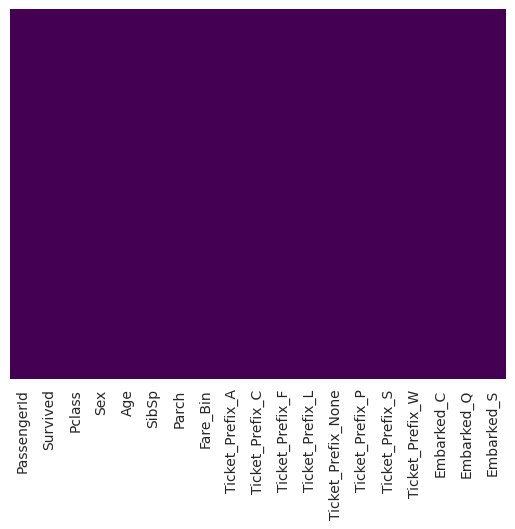

In [110]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **Converting Categorical Features**

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [111]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,38.0,1,0,3,0,0,0,0,0,1,0,0,1,0,0
2,3,1,3,0,26.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,4,1,1,0,35.0,1,0,3,0,0,0,0,1,0,0,0,0,0,1
4,5,0,3,1,35.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [112]:
# Calculate the correlation matrix
correlation_matrix = train.corr()
# Display the correlation matrix
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035840,-0.057527,-0.001652,-0.022998,-0.068852,-0.027075,-0.016409,-0.028132,0.072291,-0.030303,-0.006443,-0.004003,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.299357,-0.118757,-0.021066,0.034325,-0.018481,0.001492,0.151310,-0.035049,-0.057546,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.634271,0.151757,0.075072,-0.032868,0.055561,0.079763,-0.398009,0.092648,-0.000138,-0.243292,0.221009,0.081720
Sex,0.042939,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.243613,0.108829,0.005921,-0.040796,0.049539,-0.032507,-0.082147,0.080464,-0.047389,-0.082853,-0.074115,0.125722
Age,0.035840,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.127822,-0.011193,-0.064907,0.030285,0.016151,-0.041119,0.144981,-0.042813,0.034745,0.040700,-0.081658,0.007763
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.393025,-0.052608,0.320802,-0.007625,-0.031867,-0.080768,-0.043056,-0.062636,0.027185,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.393881,-0.071179,0.199844,0.020969,-0.031809,-0.035762,-0.041805,-0.084662,0.139881,-0.011069,-0.081228,0.063036
Fare_Bin,-0.022998,0.299357,-0.634271,-0.243613,0.127822,0.393025,0.393881,1.000000,-0.092924,0.070232,0.017287,-0.089968,-0.148359,0.307721,-0.070740,0.071499,0.186073,-0.240489,-0.018382
Ticket_Prefix_A,-0.068852,-0.118757,0.151757,0.108829,-0.011193,-0.052608,-0.071179,-0.092924,1.000000,-0.043284,-0.016322,-0.012317,-0.310944,-0.051453,-0.051453,-0.022319,-0.088416,-0.033903,0.099463
Ticket_Prefix_C,-0.027075,-0.021066,0.075072,0.005921,-0.064907,0.320802,0.199844,0.070232,-0.043284,1.000000,-0.020999,-0.015847,-0.400050,-0.066198,-0.066198,-0.028715,-0.113753,-0.072579,0.146145


In [113]:
train.drop('PassengerId',axis=1,inplace=True)
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,3,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,26.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,35.0,1,0,3,0,0,0,0,1,0,0,0,0,0,1
4,0,3,1,35.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


# **Building a Random Forest model**

In [114]:
train.drop('Survived',axis=1).head()

,Pclass,Sex,Age,SibSp,Parch,Fare_Bin,Ticket_Prefix_A,Ticket_Prefix_C,Ticket_Prefix_F,Ticket_Prefix_L,Ticket_Prefix_None,Ticket_Prefix_P,Ticket_Prefix_S,Ticket_Prefix_W,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,3,0,0,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,0,35.0,1,0,3,0,0,0,0,1,0,0,0,0,0,1
4,3,1,35.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [115]:
train['Survived'].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

# **Training and Predicting**

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
logmodel = RandomForestClassifier()
logmodel.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
predictions = logmodel.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7798507462686567

Evaluation

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       154
           1       0.77      0.69      0.73       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

